In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

import scienceplots
plt.style.use(['science','no-latex'])

df= pd.read_csv('data.csv',delimiter=',')
df

,MSD,VSD,Reading,Unnamed: 3,ring,MSD.1,VSD.1,Reading.1,Unnamed: 8,Diameter
0,37.5,35.0,37.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.0,46.0,41.46,NaN,22.0,NaN,NaN,0.00,NaN,NaN
2,41.0,35.0,41.35,NaN,20.0,33.5,11.00,33.61,NaN,7.74
3,41.0,20.0,41.20,NaN,18.0,33.5,35.00,33.85,NaN,7.35
4,40.5,47.0,40.97,NaN,16.0,34.0,4.00,34.04,NaN,6.93
5,40.5,19.0,40.69,NaN,14.0,34.0,28.00,34.28,NaN,6.41
6,40.0,45.0,40.45,NaN,12.0,34.5,1.00,34.51,NaN,5.94
7,40.0,23.0,40.23,NaN,10.0,34.5,19.00,34.69,NaN,5.54
8,39.5,47.0,39.97,NaN,8.0,35.0,1.00,35.01,NaN,4.96
9,39.5,21.0,39.71,NaN,6.0,35.0,32.00,35.32,NaN,4.39


In [2]:
n=[ 20., 18., 16., 14., 12., 10.,  8.,  6.,  4.,  3.,  2.,1.]
D=[ 7.74, 7.35, 6.93, 6.41, 5.94, 5.54, 4.96, 4.39, 3.36,2.96, 2.41, 1.67]
n=np.array(n)
D=np.array(D)

In [3]:
def f(x,a,b):
    return a*x+b
x=[1,2,2.5]
y=[4,8,9]
D=D*1e-3
popt,pcov=curve_fit(f,x,y)
popt,pcov = curve_fit(f,n,D**2)

In [4]:
popt

array([2.99393946e-06, 1.92591386e-08])

In [5]:
pcov

array([[ 9.46697005e-16, -8.99360496e-15],
       [-8.99360496e-15,  1.22280917e-13]])

In [6]:
1e9*popt[0]/(4*1.36527)

548.2321183505767

In [7]:
popt[0]/(4*5893*1e-10)

1.2701253423052634

Text(0, 0.5, 'Squared Diameter($mm^2$)')

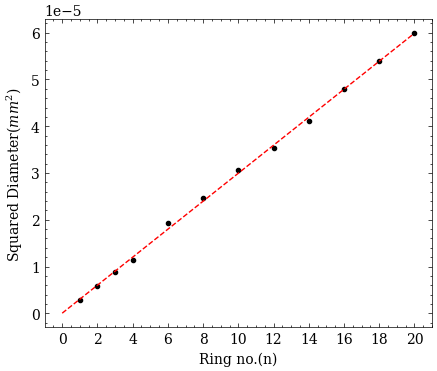

In [44]:
#D=np.array(df['Diameter'])
#n=np.array(df['ring'])
plt.figure(figsize=(5, 4))

x=np.arange(0,20,0.1)
plt.plot(n,D**2,'k.')
plt.plot(x,f(x,*popt),'r--')
plt.xticks(np.arange(0,22,2))
plt.xlabel('Ring no.(n)')
plt.ylabel('Squared Diameter($mm^2$)')

#lt.plot(x,f(x,0.0000034,),'b--')

In [9]:
f(x,*popt*1e7)

array([1.92591386e-01, 3.18653084e+00, 6.18047030e+00, 9.17440976e+00,
       1.21683492e+01, 1.51622887e+01, 1.81562281e+01, 2.11501676e+01,
       2.41441070e+01, 2.71380465e+01, 3.01319860e+01, 3.31259254e+01,
       3.61198649e+01, 3.91138043e+01, 4.21077438e+01, 4.51016832e+01,
       4.80956227e+01, 5.10895622e+01, 5.40835016e+01, 5.70774411e+01,
       6.00713805e+01, 6.30653200e+01, 6.60592594e+01, 6.90531989e+01,
       7.20471384e+01, 7.50410778e+01, 7.80350173e+01, 8.10289567e+01,
       8.40228962e+01, 8.70168356e+01, 9.00107751e+01, 9.30047145e+01,
       9.59986540e+01, 9.89925935e+01, 1.01986533e+02, 1.04980472e+02,
       1.07974412e+02, 1.10968351e+02, 1.13962291e+02, 1.16956230e+02,
       1.19950170e+02, 1.22944109e+02, 1.25938049e+02, 1.28931988e+02,
       1.31925927e+02, 1.34919867e+02, 1.37913806e+02, 1.40907746e+02,
       1.43901685e+02, 1.46895625e+02, 1.49889564e+02, 1.52883504e+02,
       1.55877443e+02, 1.58871383e+02, 1.61865322e+02, 1.64859262e+02,
      

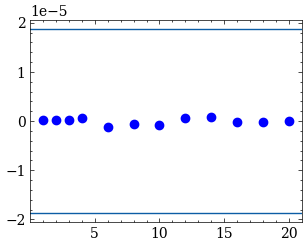

In [10]:
plt.plot(n,f(n,*popt)-D**2,'bo')
plt.axhline(np.std(D**2))
plt.axhline(-np.std(D**2))

In [11]:
D**2

D2=[59.9076,54.0225,48.0249,41.0881,35.2836,30.6916,24.6016,19.2721,11.2896,8.7616,5.8081,2.7889]
D2=np.array(D2)



$Wavelength=509.13874 +- $nm

In [12]:
def err_(D,m):
    del_D=0.01*1e-3
    del_n=1
    del_R=0.067*1e-2
    R=96.527*1e-2
    #&= \sqrt{\left( \left( D * 8 / (4 * m * R) ^ 2 * m * R \right) \cdot \Delta D \right)^2 + \left( \left( -(D ^ 2 * 4 / (4 * m * R) ^ 2 * R) \right) \cdot \Delta m \right)^2 + \left( \left( -(D ^ 2 * 4 / (4 * m * R) ^ 2 * m) \right) \cdot \Delta R \right)^2}
    return np.sqrt((D*8/((4*m*R)**2)*m*R*del_D)**2+(((D**2)*4/((4*m*R)**2)*R)*del_n)**2+(((D**2)*4/((4*m*R)**2)*m*del_R)**2))

In [13]:
dL=err_(D*1e-3,n)
def dd(D,n):
    R=1.4701
    return D**2/(4*n*R)
ll=dd(D*1e-3,n)
L=np.sum(ll/(dL**2))/np.sum(1/(dL)**2)

del_L=1/np.sqrt(np.sum(1/(dL)**2))

In [14]:
L*1e9

0.0005091561864986581

In [15]:
np.mean(dL)*1e9

0.003798642123107484

In [16]:
err_(np.mean(D*1e-3),np.mean(n))*1e9

0.00271174113033914

In [17]:
del_L*1e9

0.0008397835328614793